In [1]:
import numpy as np
import pandas as pd
import requests as r

In [32]:
df = pd.read_html('fifa_players.html', encoding='utf-8')
df

[    Unnamed: 0  Unnamed: 1  OVR-POT                        Name  \
 0          NaN         NaN     7587        Erling Braut  Håland   
 1          NaN         NaN     9393           Cristiano Ronaldo   
 2          NaN         NaN     9494                Lionel Messi   
 3          NaN         NaN     8995               Kylian Mbappé   
 4          NaN         NaN     8492                Jadon Sancho   
 5          NaN         NaN     9292                   Neymar Jr   
 6          NaN         NaN     8692             Frenkie de Jong   
 7          NaN         NaN     8892                Paulo Dybala   
 8          NaN         NaN     8187           Donny van de Beek   
 9          NaN         NaN     7685               Tammy Abraham   
 10         NaN         NaN     9191                 Eden Hazard   
 11         NaN         NaN     9090               Mohamed Salah   
 12         NaN         NaN     8788               Heung Min Son   
 13         NaN         NaN     8585         Zla

In [37]:
fifa_df = df[0]
fifa_df = fifa_df.replace(['NaN', ''], np.nan)

In [38]:
fifa_df = fifa_df.dropna(axis=1, how='all')
fifa_df

,OVR-POT,Name,Preferred Positions,Age,Hits
0,7587,Erling Braut Håland,ST,19,245
1,9393,Cristiano Ronaldo,STLW,34,185
2,9494,Lionel Messi,RWCFST,32,178
3,8995,Kylian Mbappé,STRW,20,137
4,8492,Jadon Sancho,RMLM,19,125
5,9292,Neymar Jr,LWCAM,27,118
6,8692,Frenkie de Jong,CMCDM,22,93
7,8892,Paulo Dybala,CAMRW,25,91
8,8187,Donny van de Beek,CAMCM,22,90
9,7685,Tammy Abraham,ST,22,85


In [45]:
print(fifa_df['OVR-POT'].dtype)

object


In [46]:
fifa_df['OVR-POT'] = fifa_df['OVR-POT'].astype(str)
print(fifa_df['OVR-POT'].head())

0    7587
1    9393
2    9494
3    8995
4    8492
Name: OVR-POT, dtype: object


In [47]:
fifa_df['OVR'] = fifa_df['OVR-POT'].str[:-2]
fifa_df['POT'] = fifa_df['OVR-POT'].str[-2:]
fifa_df['OVR'] = fifa_df['OVR'].astype(int)
fifa_df['POT'] = fifa_df['POT'].astype(int)
fifa_df = fifa_df.drop('OVR-POT', axis=1)
fifa_df

,Name,Preferred Positions,Age,Hits,OVR,POT
0,Erling Braut Håland,ST,19,245,75,87
1,Cristiano Ronaldo,STLW,34,185,93,93
2,Lionel Messi,RWCFST,32,178,94,94
3,Kylian Mbappé,STRW,20,137,89,95
4,Jadon Sancho,RMLM,19,125,84,92
5,Neymar Jr,LWCAM,27,118,92,92
6,Frenkie de Jong,CMCDM,22,93,86,92
7,Paulo Dybala,CAMRW,25,91,88,92
8,Donny van de Beek,CAMCM,22,90,81,87
9,Tammy Abraham,ST,22,85,76,85


In [63]:
fifa_df['Age'].dtype

dtype('int64')

In [64]:
import matplotlib as plt

In [65]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

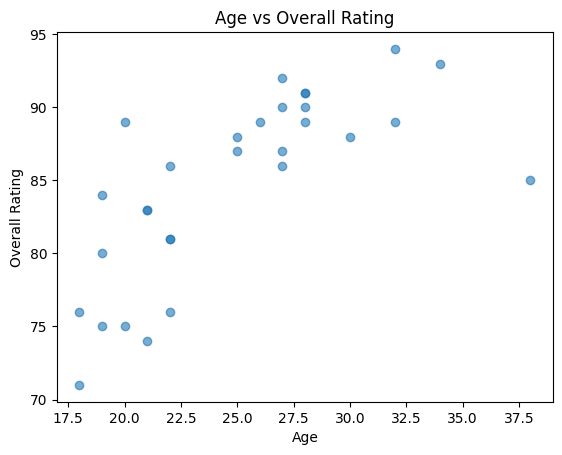

In [72]:
plt.scatter(fifa_df['Age'], fifa_df['OVR'], alpha=0.6)
plt.title('Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

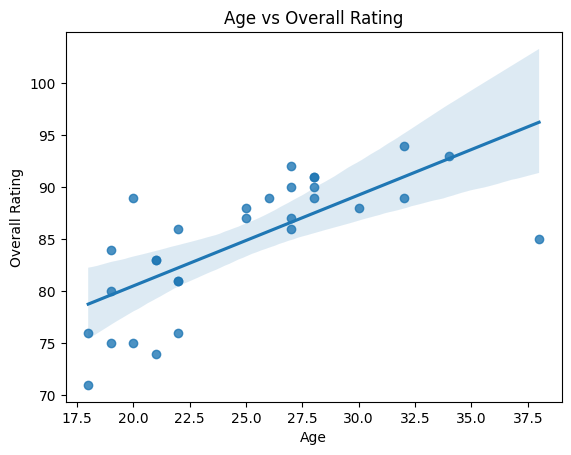

In [150]:
sns.regplot(x='Age', y='OVR', data=fifa_df)
plt.title('Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

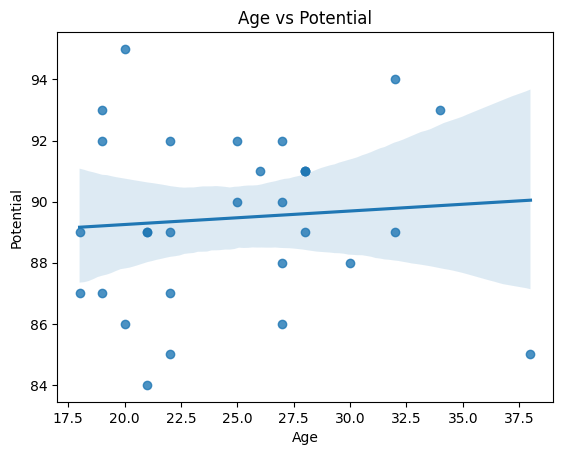

In [151]:
sns.regplot(x='Age', y='POT', data=fifa_df)
plt.title('Age vs Potential')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

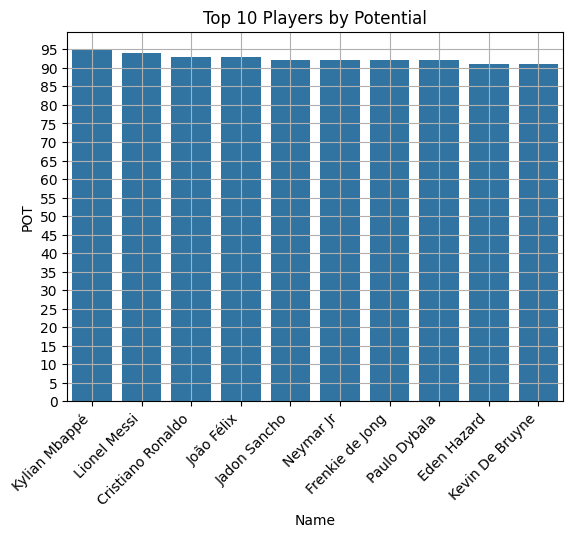

In [185]:
top_ten = fifa_df.nlargest(10,'POT')
sns.barplot(x='Name', y='POT', data=top_ten)
plt.title('Top 10 Players by Potential')
plt.xticks(rotation = 45, ha ='right')
plt.yticks(np.arange(0,100,5))
plt.grid()
plt.show()

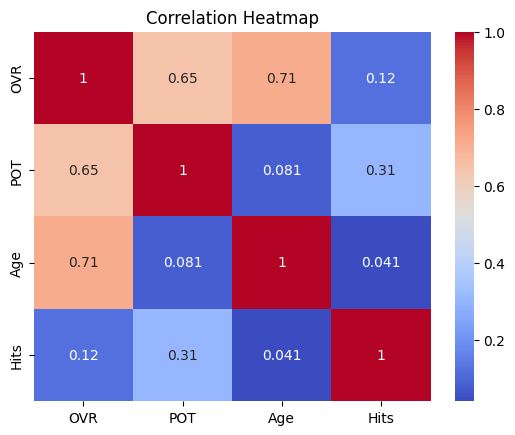

In [186]:
sns.heatmap(fifa_df[['OVR', 'POT', 'Age', 'Hits']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

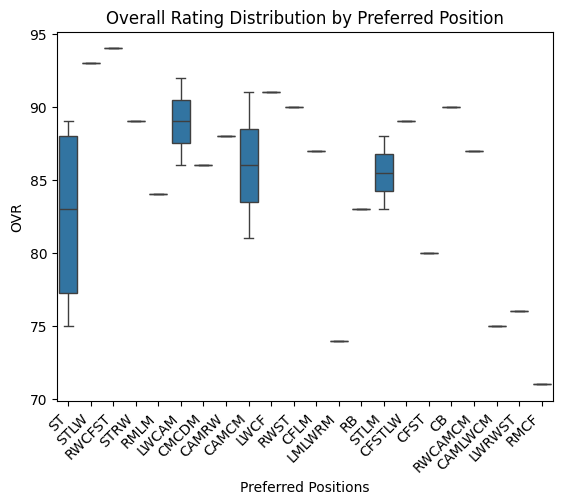

In [187]:
sns.boxplot(x='Preferred Positions', y='OVR', data=fifa_df)
plt.title('Overall Rating Distribution by Preferred Position')
plt.xticks(rotation = 45, ha ='right')
plt.show()

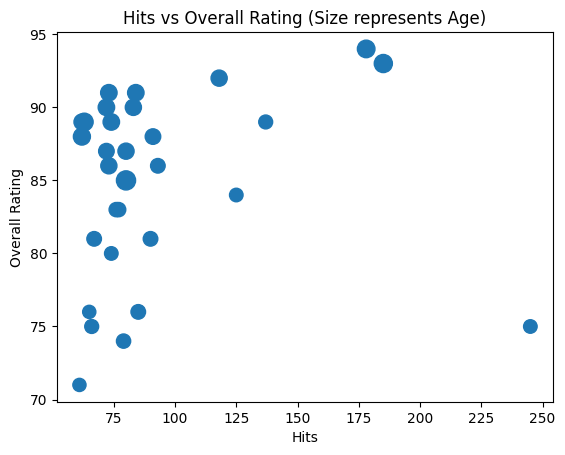

In [188]:
plt.scatter(fifa_df['Hits'], fifa_df['OVR'], s=fifa_df['Age']*5)
plt.title('Hits vs Overall Rating (Size represents Age)')
plt.xlabel('Hits')
plt.ylabel('Overall Rating')
plt.show()

In [189]:
highest_rated = fifa_df.loc[fifa_df['OVR'].idxmax()]
most_hits = fifa_df.loc[fifa_df['Hits'].idxmax()]
highest_potential = fifa_df.loc[fifa_df['POT'].idxmax()]
highest_rated

Name                   Lionel Messi
Preferred Positions          RWCFST
Age                              32
Hits                            178
OVR                              94
POT                              94
Improvement                       0
Name: 2, dtype: object

In [190]:
highest_potential

Name                   Kylian Mbappé
Preferred Positions             STRW
Age                               20
Hits                             137
OVR                               89
POT                               95
Improvement                        6
Name: 3, dtype: object

In [191]:
most_hits

Name                   Erling Braut  Håland
Preferred Positions                      ST
Age                                      19
Hits                                    245
OVR                                      75
POT                                      87
Improvement                              12
Name: 0, dtype: object

In [192]:
fifa_df['Improvement'] = fifa_df['POT'] - fifa_df['OVR']
most_improvement = fifa_df.loc[fifa_df['Improvement'].idxmax()]
print(f"Player with most room for improvement: {most_improvement['Name']}") 
print(f"POT-OVR difference: {most_improvement['Improvement']}")

Player with most room for improvement: Takefusa KuboL
POT-OVR difference: 16


In [193]:
avg_by_position = fifa_df.groupby('Preferred Positions').agg({'OVR': 'mean', 'POT': 'mean'}).sort_values('OVR', ascending=False)
print("\nAverage OVR and POT by position:")
print(avg_by_position)


Average OVR and POT by position:
                      OVR        POT
Preferred Positions                 
RWCFST               94.0  94.000000
STLW                 93.0  93.000000
LWCF                 91.0  91.000000
CB                   90.0  91.000000
RWST                 90.0  90.000000
STRW                 89.0  95.000000
CFSTLW               89.0  89.000000
LWCAM                89.0  89.000000
CAMRW                88.0  92.000000
RWCAMCM              87.0  90.000000
CFLM                 87.0  88.000000
CAMCM                86.0  89.000000
CMCDM                86.0  92.000000
STLM                 85.5  88.500000
RMLM                 84.0  92.000000
RB                   83.0  89.000000
ST                   82.5  87.666667
CFST                 80.0  93.000000
LWRWST               76.0  89.000000
CAMLWCM              75.0  86.000000
LMLWRM               74.0  84.000000
RMCF                 71.0  87.000000
